In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
df = pd.read_csv('strokes-data.csv')
df = df.drop(['Residence_type'], axis=1)
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
2603,32445,Female,78.0,0,0,Yes,Self-employed,79.55,21.1,formerly smoked,0
515,67733,Female,28.0,0,0,Yes,Private,183.45,40.5,smokes,0
3316,17893,Female,82.0,0,0,Yes,Self-employed,84.78,33.6,formerly smoked,0
1231,69355,Male,3.0,0,0,No,children,86.38,22.8,Unknown,0
436,22091,Female,62.0,0,0,Yes,Self-employed,180.63,31.8,formerly smoked,0
2590,18996,Female,13.0,0,0,No,children,105.22,18.4,Unknown,0
1716,1486,Female,33.0,0,0,Yes,Private,124.01,22.7,Unknown,0
2687,47405,Female,2.0,0,0,No,children,100.66,18.5,Unknown,0
3782,5006,Female,46.0,0,0,Yes,Self-employed,85.84,21.2,never smoked,0
2661,59762,Male,61.0,0,0,Yes,Private,227.98,14.2,Unknown,0


### On enlève les données érronées

↦ bmi nulle


In [67]:
df = df.dropna(axis=0)

In [68]:
df = df.dropna(axis=0)
df = df.drop(['id'], axis=1)
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
5098,Male,9.0,0,0,No,children,71.88,17.5,Unknown,0
5100,Male,82.0,1,0,Yes,Self-employed,71.97,28.3,never smoked,0
5101,Female,45.0,0,0,Yes,Private,97.95,24.5,Unknown,0
5102,Female,57.0,0,0,Yes,Private,77.93,21.7,never smoked,0
5103,Female,18.0,0,0,No,Private,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,85.28,26.2,Unknown,0


### On enlève les colonnes inutiles

↦ Colonne 'id'

In [69]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [70]:
df.describe(include='object')

,gender,ever_married,work_type,smoking_status
count,4909,4909,4909,4909
unique,3,2,5,4
top,Female,Yes,Private,never smoked
freq,2897,3204,2811,1852


In [71]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [72]:
#df['stroke'].value_counts().plot.bar()
df.groupby(['gender', 'heart_disease']).mean()

age  hypertension  avg_glucose_level        bmi  \
gender heart_disease                                                          
Female 0              42.508159      0.081158         101.960933  29.024955   
       1              69.440000      0.240000         141.620300  30.207000   
Male   0              40.103747      0.088865         106.379486  28.514347   
       1              67.461538      0.237762         131.021049  30.393007   

                        stroke  
gender heart_disease            
Female 0              0.037183  
       1              0.160000  
Male   0              0.034797  
       1              0.167832

In [73]:
df[df['age'] < 18].groupby(['gender']).mean() # Seulement les mineurs groupés par genre

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,8.792958,0.000000,0.000000,93.285550,21.538142,0.002445
Male,8.390632,0.002342,0.002342,94.828642,21.253396,0.000000


### On remplace les mots par des chiffres

gender: <br>
    ↦ Homme = 1<br>
    ↦ Femme = 0<br>
    
ever_married:<br>
    ↦ Yes = 1<br>
    ↦ No = 0<br>

work_type:<br>
    ↦ children = 0<br>
    ↦ Private = 1<br>
    ↦ Self-employed = 2<br>
    ↦ Govt-job = 3<br>
    ↦ Never_worked = 4<br>

smoking_status:<br>
    ↦ never smoked = 1<br>
    ↦ Unknown = 0<br>
    ↦ formerly smoke = 2<br>
    ↦ smokes = 3

In [74]:
df = df.replace(['Male', 'Female', 'Yes', 'No', 'children', 'Private', 'Self-employed', 'Govt-job','Govt_job','Never_worked', 'Unknown',
                 'never smoked', ' formerly smoked', 'formerly smoked', 'smokes'], [1,0,1,0,0,1,2,3,3,4,0,1,2,2,3])
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
3243,0,66.0,1,0,1,3,205.01,52.7,2,0
1391,1,74.0,0,0,1,2,61.78,25.8,0,0
3270,0,45.0,0,0,1,2,69.76,25.3,3,0
2351,0,41.0,0,0,1,1,89.88,33.1,2,0
4621,0,55.0,0,0,1,1,65.22,19.8,1,0
4448,1,78.0,0,0,1,1,83.20,21.2,2,0
826,0,36.0,1,0,1,1,91.56,42.2,1,0
3370,0,8.0,0,0,0,0,67.84,24.0,0,0
3051,0,10.0,0,0,0,0,84.86,28.6,1,0
2410,0,56.0,0,0,1,1,131.63,27.6,1,0


In [75]:
df.groupby(['gender', 'ever_married']).mean()

age  hypertension  heart_disease  work_type  \
gender ever_married                                                      
0      0             23.698465      0.030083       0.015560   0.905602   
       1             53.281945      0.114847       0.043973   1.542680   
1      0             19.363243      0.024324       0.017568   0.748649   
       1             55.257278      0.143194       0.102282   1.517703   

                     avg_glucose_level        bmi  smoking_status    stroke  
gender ever_married                                                          
0      0                     95.673019  25.696473        0.836100  0.016598  
       1                    107.148458  30.746042        1.338852  0.053802  
1      0                     96.563527  24.590946        0.660811  0.009459  
       1                    114.866939  31.009992        1.457120  0.064516

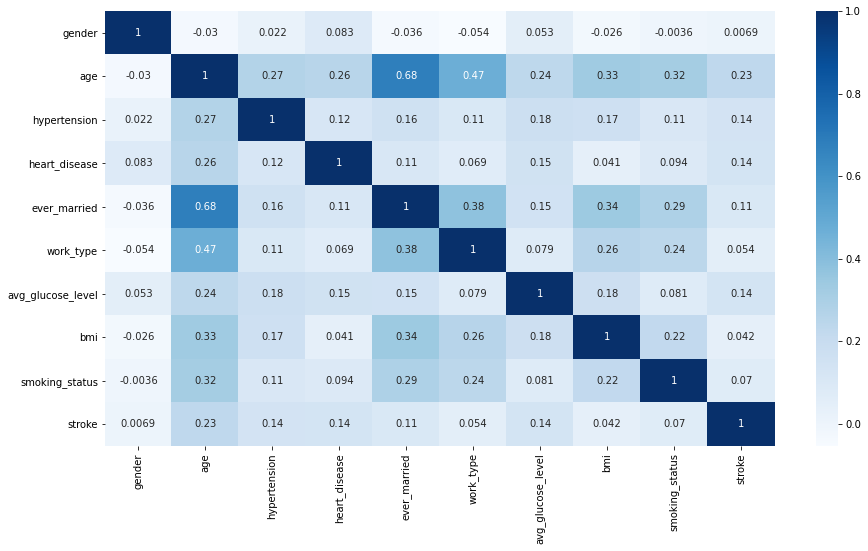

In [76]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap='Blues')
plt.show()

### Programme de Machine Learning (sans séparation et optimisation)
Ici, on entraine et test le modele sur les memes données c'est pour ce la que le score est haut

In [77]:
from sklearn.neighbors import KNeighborsClassifier
modelWithoutSeparation = KNeighborsClassifier()

In [78]:
y = df['stroke']
X = df.drop('stroke', axis=1)

In [79]:
modelWithoutSeparation.fit(X,y)
modelWithoutSeparation.score(X,y)

0.9586389568052159

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y,modelWithoutSeparation.predict(X)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4699
           1       0.61      0.08      0.14       209

    accuracy                           0.96      4908
   macro avg       0.78      0.54      0.56      4908
weighted avg       0.95      0.96      0.94      4908



<AxesSubplot:>

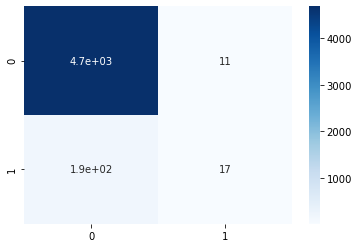

In [81]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, modelWithoutSeparation.predict(X)),annot = True,cmap='Blues')

In [82]:
def avc(model, gender, age, hypertension, heart_disease, ever_married, work_type, avg_glucose_level, bmi, smoking_status):
    x = np.array([gender, age, hypertension, heart_disease, ever_married, work_type, 
                  avg_glucose_level, bmi, smoking_status]).reshape(1, 9)
    print("D'après le modèle :", model.predict(x)[0])
    print("Probabilité de ne pas avoir d'AVC =", round(model.predict_proba(x)[0][0]*100, 1),"%")
    print("Probabilité d'avoir un AVC =", round(model.predict_proba(x)[0][1]*100, 1),"%")

### A partir d'ici, on divise les données
On divise le dataset pour obtenir un score que reflète + la réalité

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set :", X_train.shape)
print("Test set :", X_test.shape)

Train set : (3926, 9)
Test set : (982, 9)


In [85]:
modelWithSeparation = KNeighborsClassifier(n_neighbors = 1)
modelWithSeparation.fit(X_train, y_train)

print("Train score :", modelWithSeparation.score(X_train, y_train))
print("Test score :", modelWithSeparation.score(X_test, y_test))
print(classification_report(y_test,modelWithSeparation.predict(X_test)))

Train score : 1.0
Test score : 0.9236252545824847
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       945
           1       0.10      0.14      0.12        37

    accuracy                           0.92       982
   macro avg       0.53      0.54      0.54       982
weighted avg       0.93      0.92      0.93       982



#### Remarques :
On remarque ici que le train score est a 100% (normal il a été entrainé dessus) et que le test score est a 92,9% (au lieau de 95.9% tout à l'heure)


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [88]:
grid.best_score_

0.956189688983971

In [89]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 12}

In [90]:
modelWithGridSearch = grid.best_estimator_

In [127]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,modelWithGridSearch.predict(X_test)))

[[945   0]
 [ 37   0]]


### Tests divers et varié
ConfusionMatrix

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_train, modelWithGridSearch.predict(X_train))

array([[3754,    0],
       [ 172,    0]], dtype=int64)

#### Remarques :
On remarque que le modèle classe tout dans '0' car cela lui procure le moins d'erreur<br>
Le score est bon mais le modeèle ne l'est pas<br><br><br><br>
### Nouveau modèle : Random Forest Generator
On test un nouveau modèle

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model2 = RandomForestClassifier()

In [96]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9623217922606925

In [97]:
confusion_matrix(y_test, model2.predict(X_test))

array([[943,   2],
       [ 35,   2]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       0.50      0.05      0.10        37

    accuracy                           0.96       982
   macro avg       0.73      0.53      0.54       982
weighted avg       0.95      0.96      0.95       982



#### Score
**S = Nombre de cas bien placés / Nombre de cas total** 
#### Precision
**P = True Positive / ( True Positive + False Positive )** |||| La Precision est le ratio des observations prédites positives correctement sur le total des observations prédites positives
#### Recall
**R = True Positive / ( True Positive + False Negative )** |||| Le Recall (ou Sensitivity) est le ratio des observations prédites positives correctement sur l’ensemble des observations réellement positives
#### F1-Score
**F = 2 R P / ( R + P )** |||| Le score f1 est la moyenne pondérée de la Precision et du Recall cela représente le score réel
<br><br>
#### Remarques:
En vrai la précision n'est pas du tout bonne pour le classement des 1 (AVC)

In [99]:
ClassWeightModel = RandomForestClassifier(class_weight='balanced')

In [100]:
ClassWeightModel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [101]:
ClassWeightModel.score(X_test, y_test)

0.9633401221995926

In [102]:
confusion_matrix(y_test, ClassWeightModel.predict(X_test))

array([[945,   0],
       [ 36,   1]], dtype=int64)

In [103]:
print(classification_report(y_test,ClassWeightModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       1.00      0.03      0.05        37

    accuracy                           0.96       982
   macro avg       0.98      0.51      0.52       982
weighted avg       0.96      0.96      0.95       982



In [104]:
ClassWeightKNN = KNeighborsClassifier(n_neighbors = 12, metric = 'euclidean', weights = 'uniform')

In [105]:
ClassWeightKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [106]:
ClassWeightKNN.score(X_test, y_test)

0.9623217922606925

In [107]:
confusion_matrix(y_test, ClassWeightKNN.predict(X_test))

array([[945,   0],
       [ 37,   0]], dtype=int64)

In [108]:
from sklearn.base import _ClassNamePrefixFeaturesOutMixin
from sklearn.utils.fixes import *
from imblearn.over_sampling import SMOTE, SMOTENC

In [109]:
seed = 5
smote = SMOTE(sampling_strategy='auto', random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Resample data
Methode SMOTE : Synthetic Minority Over-sampling Technique

In [110]:
SmoteModel = RandomForestClassifier()

In [111]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
SmoteModel = RandomForestClassifier()
SmoteModel.fit(X_train_smote, y_train_smote)
print(classification_report(y_test,SmoteModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       945
           1       0.14      0.30      0.19        37

    accuracy                           0.91       982
   macro avg       0.56      0.61      0.57       982
weighted avg       0.94      0.91      0.92       982



In [112]:
SmoteModel.score(X_test, y_test)

0.905295315682281

<AxesSubplot:>

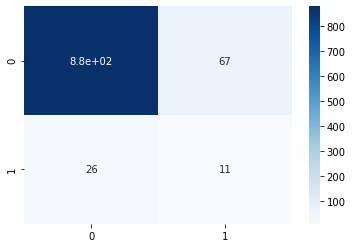

In [113]:
confMatrix = confusion_matrix(y_test, SmoteModel.predict(X_test))
sns.heatmap(confMatrix,annot = True,cmap='Blues')

In [114]:
print(classification_report(y_test,SmoteModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       945
           1       0.14      0.30      0.19        37

    accuracy                           0.91       982
   macro avg       0.56      0.61      0.57       982
weighted avg       0.94      0.91      0.92       982



In [115]:
TP = confMatrix[0][0]
FN = confMatrix[0][1]
FP = confMatrix[1][0]
TN = confMatrix[1][1]

In [116]:
R = TN / (TN + FN)
P = TN / (TN + FP)
F = 2 * R * P / (R + P)

In [117]:
round(F*100, 2)

19.13

In [118]:
X_smote, y_smote = smote.fit_resample(X,y)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=7)
SmoteModelSplit = RandomForestClassifier()
SmoteModelSplit.fit(X_smote_train, y_smote_train)
print(classification_report(y_smote_test,SmoteModelSplit.predict(X_smote_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       963
           1       0.93      0.97      0.95       917

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [119]:
SmoteModelSplit.score(X_smote_test, y_smote_test)

0.951063829787234

<AxesSubplot:>

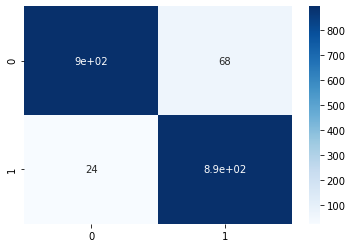

In [120]:
confMatrix2 = confusion_matrix(y_smote_test, SmoteModelSplit.predict(X_smote_test))
sns.heatmap(confMatrix2,annot = True,cmap='Blues')

In [121]:
TP = confMatrix2[0][0]
FN = confMatrix2[0][1]
FP = confMatrix2[1][0]
TN = confMatrix2[1][1]

In [122]:
P = TN / (TN + FN)
R = TN / (TN + FP)
F = 2 * R * P / (R + P)

In [123]:
round(F*100, 2)

95.1

In [124]:
round(P*100, 2)

92.92

In [125]:
round(R*100,2)

97.38

In [126]:
confMatrix2

array([[895,  68],
       [ 24, 893]], dtype=int64)